In [1]:
# Neural Networks in Keras (Lesson5)
# dowloaded    small_test_traffic.p, small_train_traffic.

# Testing in Keras (Lesson10)
!python --version
import keras; print('Keras ' + keras.__version__)
import tensorflow as tf; print('TensorFlow ' + tf.__version__)

Python 3.5.2


Using TensorFlow backend.


Keras 1.2.1
TensorFlow 0.12.1


In [2]:
import csv
  
lines=[]

#default
#xfile='./data/data/'
#split_code='/'

xfile='./bag/bag00/'
split_code='\\'


print(xfile)
with open(xfile+'driving_log.csv') as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            lines.append(line)

# lines記録：[0]center,[1]left,[2]right,[3]steering,[4]throttle,[5]brake,[6]speed

#print(lines[0],'length:',len(lines[0]),type(lines[0]))
#print(line,'length:',len(line),type(line))

test=lines[0][0]
test=test.split('\\')[-1]
print(test)

print(lines[0],'length:',len(lines[0]),type(lines[0]))
print(lines[0][6],'length:',len(lines[0][6]),type(lines[0][6]))


./bag/bag00/
center_2018_01_04_23_20_31_118.jpg
['C:\\sim\\bag00\\IMG\\center_2018_01_04_23_20_31_118.jpg', 'C:\\sim\\bag00\\IMG\\left_2018_01_04_23_20_31_118.jpg', 'C:\\sim\\bag00\\IMG\\right_2018_01_04_23_20_31_118.jpg', '0', '0', '0', '16.07618'] length: 7 <class 'list'>
16.07618 length: 8 <class 'str'>


(0,)
uint8 uint8
uint8 uint8
uint8 uint8
uint8 uint8
uint8 uint8
(160, 320, 3) (768000,)
<class 'numpy.uint8'> (768000,) (5, 160, 320, 3) <class 'numpy.ndarray'>
<class 'numpy.uint8'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


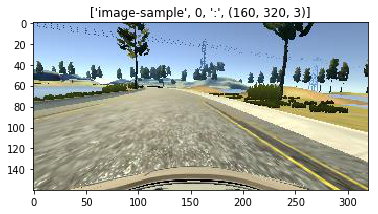

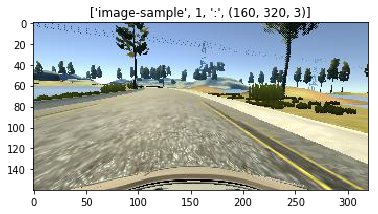

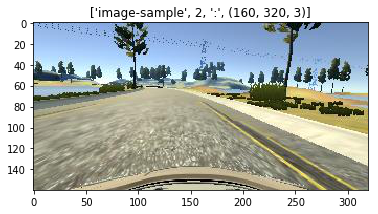

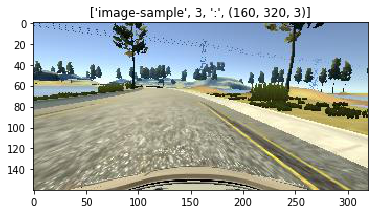

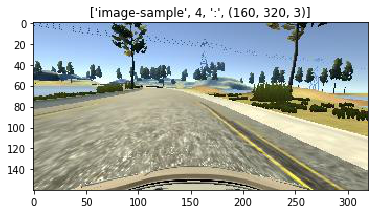

In [26]:
#"""
import numpy as np
import cv2
from skimage import io
N=3

x = np.array( [] )
z = []   
print(x.shape)

for i in range (5):
    source_path=lines[i][0]
    filename=source_path.rsplit(split_code)[-1]
    current_path=xfile+'IMG/'+filename
    if N==1 :
        ximg=cv2.imread(current_path,cv2.IMREAD_GRAYSCALE)
    else:
        #ximg=cv2.imread(current_path)
        ximg=io.imread(current_path)
        
    z.append(ximg)
    #x = np.append(x, ximg) いきなりappendすると、dtypeがfloat64
    if(x.shape[0]==0):
        x=ximg
    else:
        x = np.append(x,ximg)
        
    #print(type(ximg),type(x[i]))
    print(ximg.dtype,x[i].dtype)
    
    
print(ximg.shape,x.shape)
Z=np.asarray(z)
print(type(x[0]),x.shape,Z.shape,type(Z[0]))
y=np.reshape(x,[5,160,320,N])

#y=x.reshape(-1,)
print(type(x[0]),type(y[0]),type(Z[0]))


import matplotlib.pyplot as plt
%matplotlib inline

for i in range (5):
    T=y[i]
    plt.imshow(T.squeeze())
    plt.imshow(T.squeeze())
    plt.title(['image-sample',i,':',T.shape])
    plt.show()
 

In [14]:

import cv2
from skimage import io
  

c_images=[]
l_images=[]
r_images=[]

steering=[]
speed=[]

for line in lines:
    if(line[3]=='steering'):
         continue;
    steering.append(float(line[3]))
    speed.append(float(line[6]))
    for i in range (3):
        source_path=line[i]
        #  csvから画像ファイル名を取得    
        #  filename=source_path.split('/')[-1]
        #  filename=source_path.rsplit('\\')[-1]
        filename=source_path.rsplit(split_code)[-1]
    
        
        #　パス名を変更
        #  print(filename)
        current_path=xfile+'IMG/'+filename
        #  print(current_path)    

        #　OpenCVのimreadを使うとBGRで読み込み
        #  images.append(cv2.imread(current_path))
        #　skimageのimreadを使うとRGBで読み込み

        if(i==0):
            c_images.append(io.imread(current_path))
        if(i==1):
            l_images.append(io.imread(current_path))
        if(i==2):
            r_images.append(io.imread(current_path))


print(c_images.shape)

import numpy as np
cImages= np.asarray(c_images)
lImages= np.asarray(l_images)
rImages= np.asarray(r_images)
print(cImages.shape)




xImages= np.asarray([cImages,lImages,rImages])
mesurements=np.asarraynp.append([steering,speed])

print(xImages.shape,mesurements.shape)


AttributeError: 'list' object has no attribute 'shape'

In [ ]:

print(mesurements.shape,max(mesurements[0]),min(mesurements[0]))
#target=1500
target=mesurements[0].argmax()



import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(xImages[0][target].squeeze())
plt.title(['image-sample',target,':',xImages[0][target].shape,str(mesurements[0][target])])
plt.show()